Range Chart

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for interactive charts, change to 'default'
# or use any method available in 'plotly renderers wiki'
render = 'png'

In [2]:
import pandas as pd

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

df_ticks.head()
len(df_ticks)

,ask,close,spread
datetime,,,
2025-05-15 00:00:00.650,41839.4,41838.3,1.1
2025-05-15 00:00:01.002,41839.8,41838.7,1.1
2025-05-15 00:00:01.252,41840.2,41839.1,1.1
2025-05-15 00:00:01.405,41840.9,41839.8,1.1
2025-05-15 00:00:01.658,41840.6,41839.5,1.1


180399

In [3]:
from rangedf import Range
r = Range(df_ticks, range_size=14)
df_ohlc = r.range_df()
df_ohlc.head()
len(df_ohlc)

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:02:42.155,41846.1,41857.8,41843.8,41857.8,82.0
2025-05-15 00:10:01.915,41858.6,41866.5,41852.5,41866.5,163.0
2025-05-15 00:25:53.644,41866.8,41873.9,41859.9,41859.9,392.0
2025-05-15 00:28:01.247,41859.2,41865.5,41851.5,41865.5,70.0
2025-05-15 00:38:27.845,41865.7,41877.6,41863.6,41877.6,274.0


1353

In [4]:
from order_flow_aggregated import OrderFlowAggregated
odft = OrderFlowAggregated(df_ohlc, df_ticks, 3, is_open_time=False)

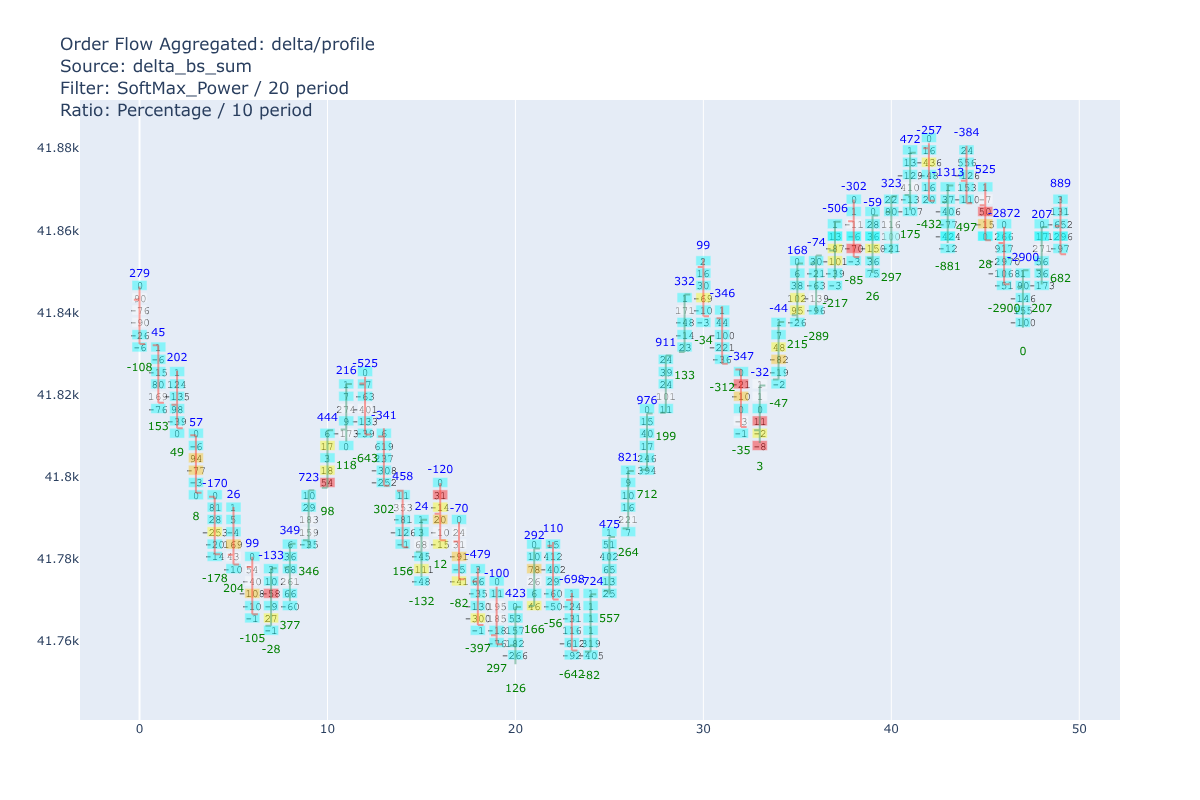

In [5]:
from order_flow_aggregated import SpikePlot
plot_params = SpikePlot(spike_chart=True)
odft.plot([50, 100], mode='delta', chart='ohlc', spike_plot=plot_params, renderer=render)

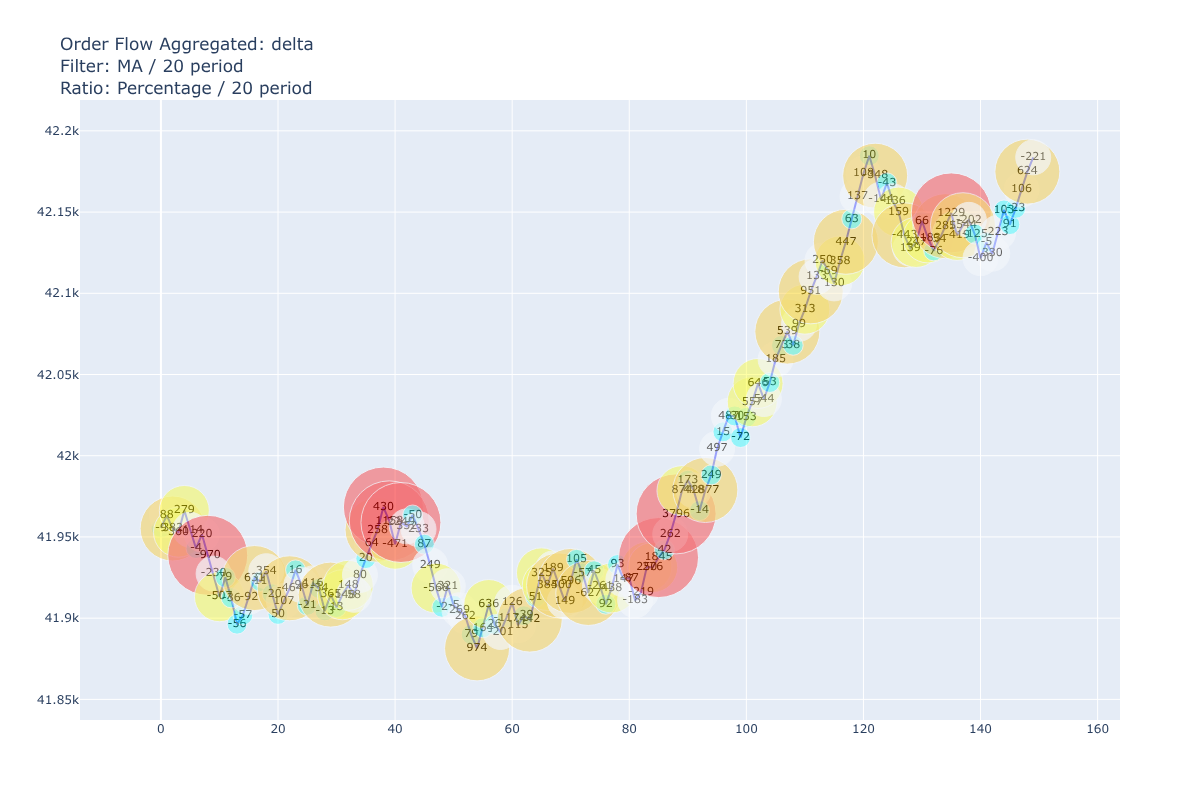

In [6]:
odft.plot_bubbles([350, 500], 'delta', 'heatmap', renderer=render)

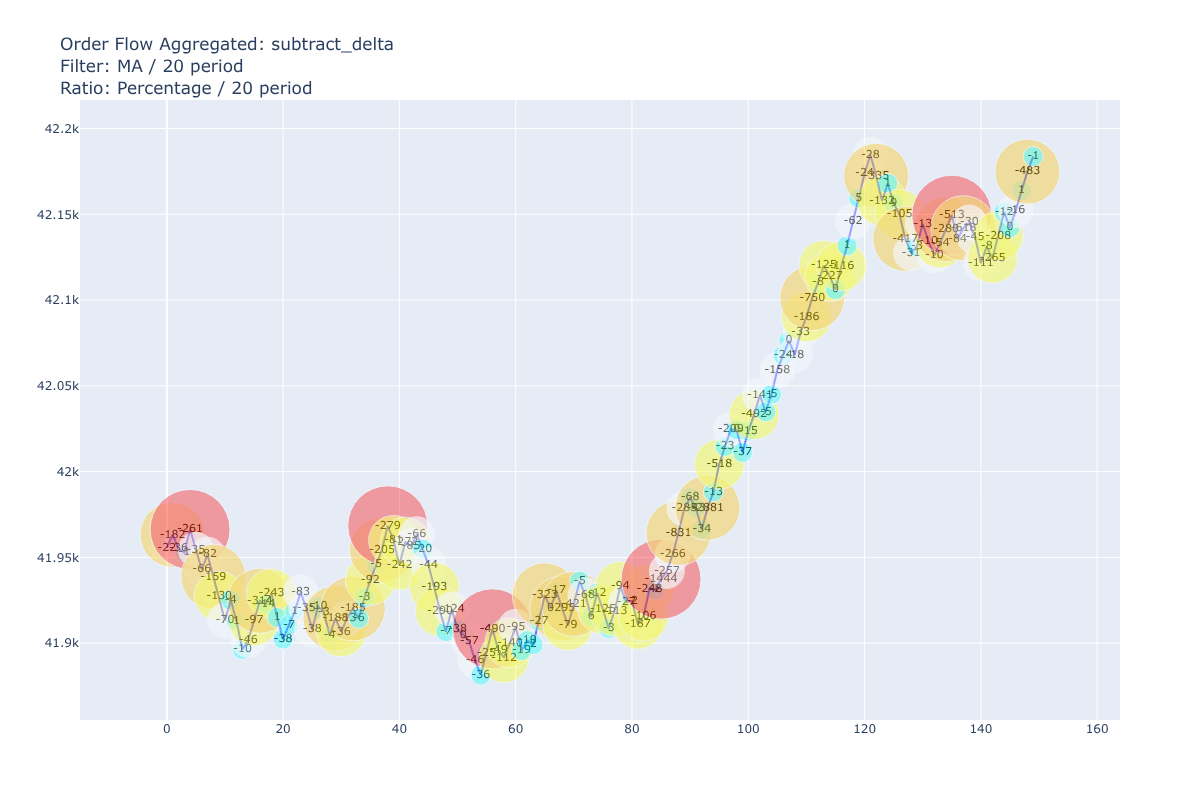

In [7]:
odft.plot_bubbles([350, 500], 'subtract', 'heatmap', renderer=render)
# other sources ['sum', bs_sum']

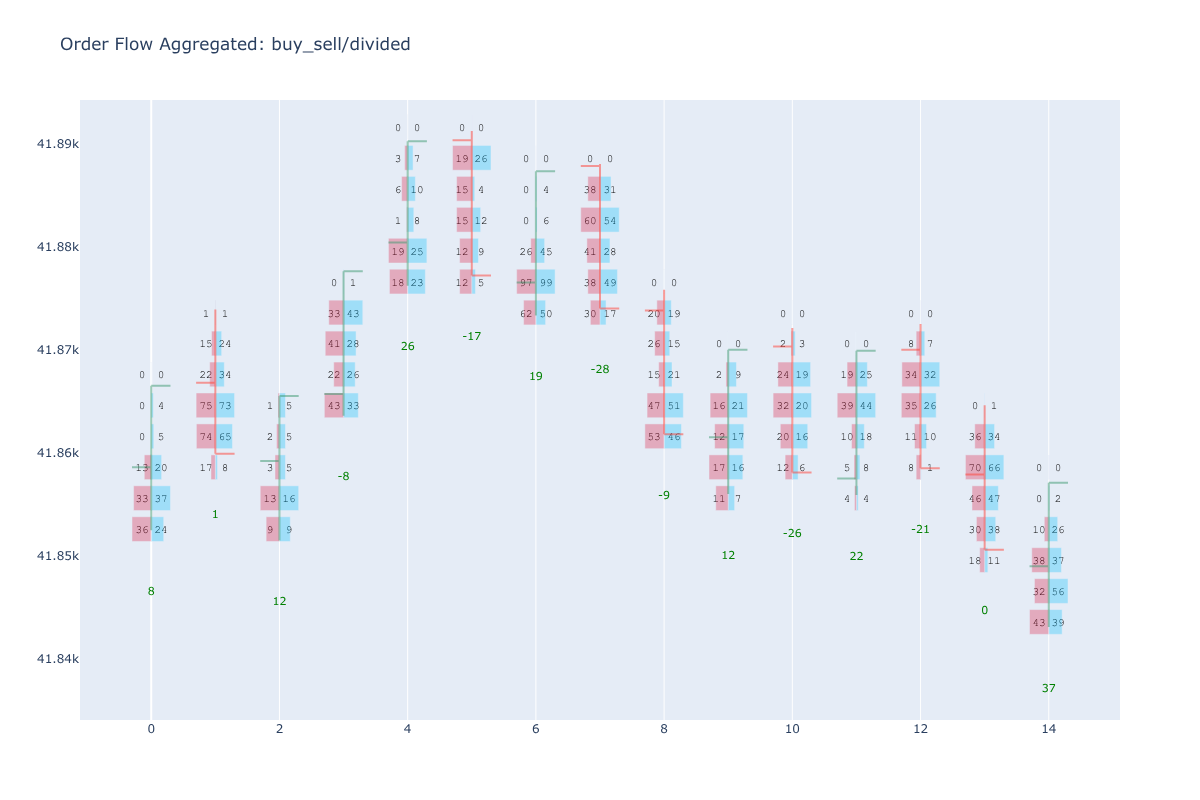

In [8]:
odft.plot(mode='buy_sell', view='divided', chart='ohlc', renderer=render)

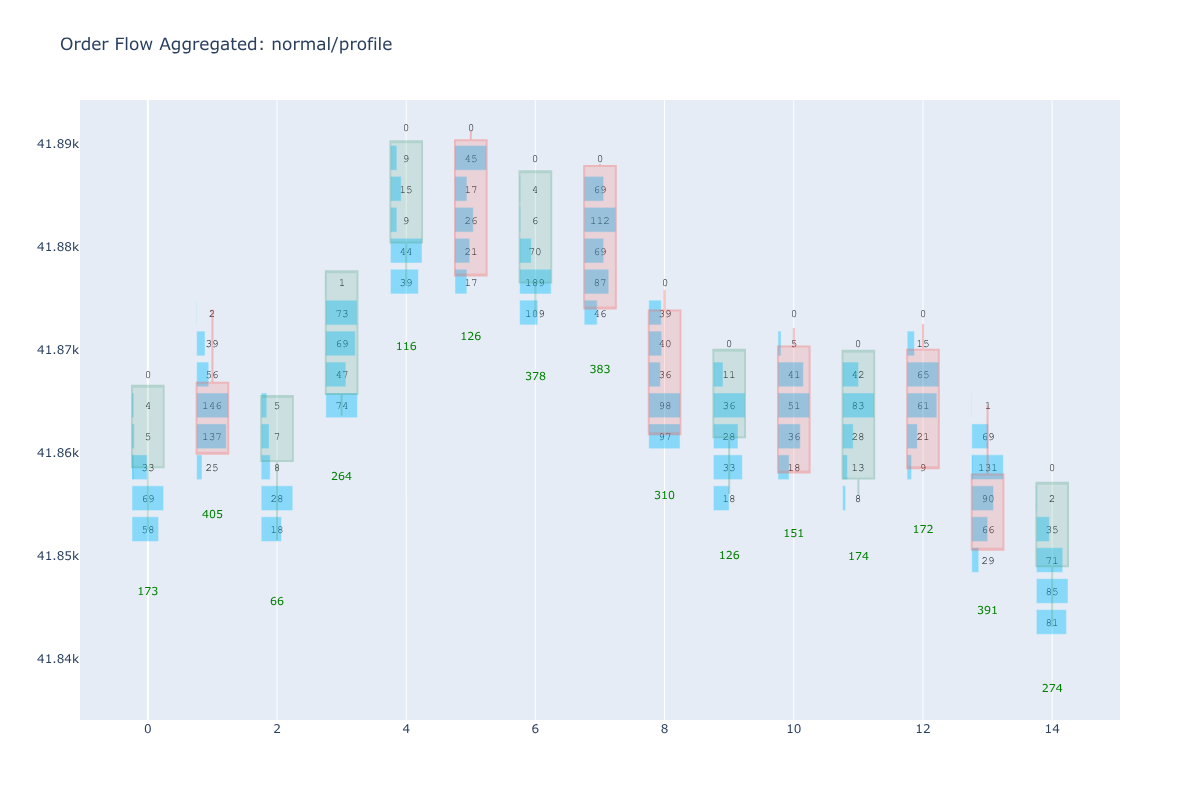

In [9]:
odft.plot(mode='normal', chart='candle', renderer=render)

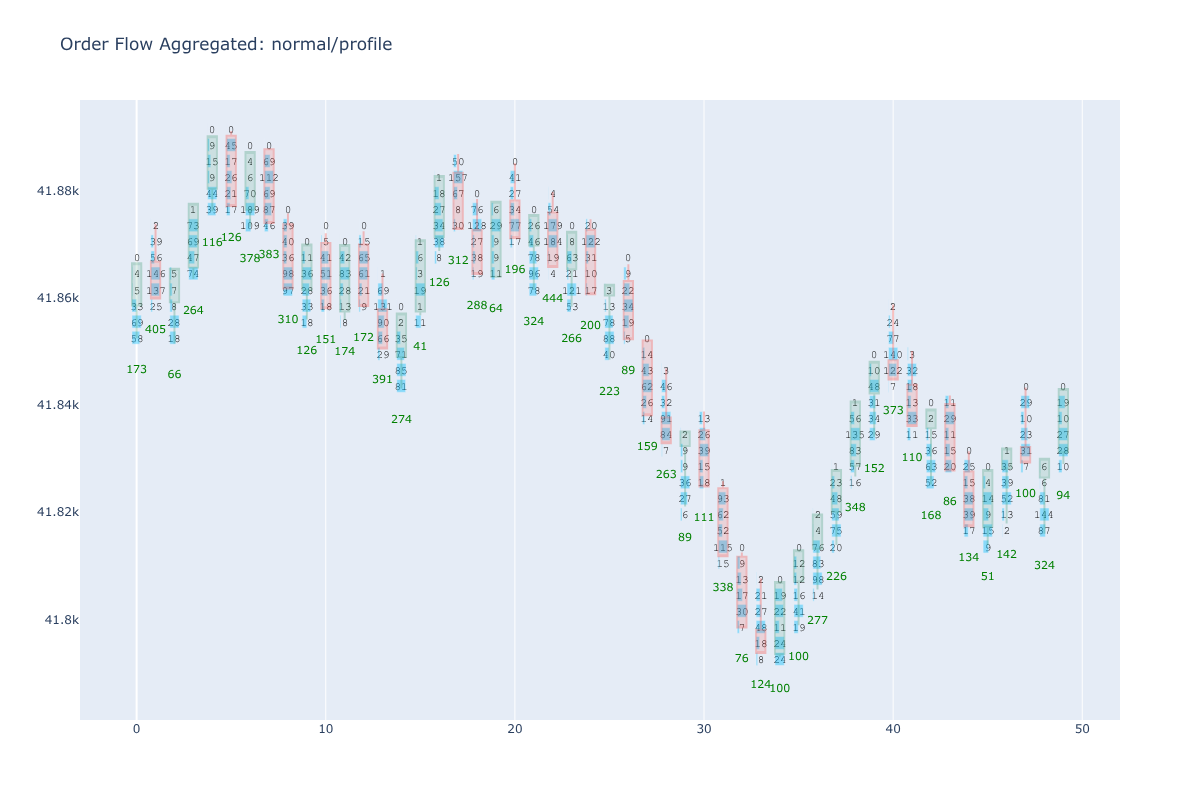

In [10]:
odft.plot(iloc_value=50, mode='normal', chart='candle', renderer=render)